<p style="text-align:center;">ESTRUCTURA DE DATOS</p>

<p style="text-align:center;">Implementacion y Analisis complejidad de Listas</p>


<p style="text-align:center;"> Jared Mijail Ramirez Escalante </p>
<p style="text-align:center;"> Jramirezes@unal.edu.co </p>


**Introducción:**

Se realizó un código implementando los métodos dados en clase para una estructura de datos de lista, posteriormente se realizó un análisis de la complejidad algorítmica de estos métodos.

**Descripción:**


Para esta tarea inicialmente se realizó un codigo en C++ que está en el archivo list.cpp, después de probar este código se realizó un binding de c++ con python a través de la librería **pybind11**, sin embargo hubieron problemas para hacer este bidding de forma que quedó la librería pyd pero esta no se pudo probar, pero de igual forma se adjunta.


De forma alternativa y debido a los problemas para realizar el binding finalmente se realizó el mismo código en python, y este fue el código analizado.


Para medir el tiempo de ejecución se utilizó **timeit** y para las gráficas se utilizó **Matplotlib**

**Implementacion:**


In [ ]:
def push_front(self, element):
        if self.size >= self.max_size:
            raise OverflowError("List is full")
        for i in range(self.size, 0, -1):
            self.data[i] = self.data[i - 1]
        self.data[0] = element
        self.size += 1

Para este método primero se mira que no exista un overflow, osea que haya espacio suficiente en el array, después se mueve toda la lista un espacio, para abrir el espacio necesario para añadir el nuevo elemento al principio, se asigna este elemento y se incrementa el contador de elementos.


Osea tenemos una complejidad algorítmica O(n)

In [ ]:
def push_back(self, element):
    if self.size >= self.max_size:
        raise OverflowError("List is full")
    self.data[self.size] = element
    self.size += 1

Este método es sencillo, se revisa que haya espacio suficiente y después se halla en el nuevo elemento en donde tenemos nuestro contador finalmente, se aumenta el contador.


Tenemos una complejidad O(1) pues sin importar los elementos de la lista siempre se harán los mismos pasos.


In [ ]:
def pop_front(self):
        if self.is_empty():
            raise IndexError("List is empty")
        for i in range(self.size - 1):
            self.data[i] = self.data[i + 1]
        self.size -= 1

Este método es parecido a Push_Front, miramos que la lista no está vacía y después movemos todos los elementos un espacio hacia adelante.


Tenemos una complejidad O(n) pues dependemos de la cantidad de elementos de la lista


In [ ]:
def pop_back(self):
        if self.is_empty():
            raise IndexError("List is empty")
        self.size -= 1

Similar a push_back, miramos que la lista no esté vacía, y después solo disminuimos el contador de la cantidad de elementos que tenemos, efectivamente dejando de contar el último elemento aun asi siga en memoria.


Tenemos una complejidad O(1)


In [ ]:
def find(self, element):
        for i in range(self.size):
            if self.data[i] == element:
                return True
        return False

Recorremos la lista hasta encontrar el elemento que buscamos y la complejidad de esta función será discutida más adelante, pero podemos decir que es O(n) pues si es el último elemento el que tiene que encontrar, tenemos un método que recorre toda la lista.

In [ ]:
def erase(self, element):
        index = -1
        for i in range(self.size):
            if self.data[i] == element:
                index = i
                break
        if index == -1:
            raise ValueError("Element not found")
        for i in range(index, self.size - 1):
            self.data[i] = self.data[i + 1]
        self.size -= 1

Erase es similar a find pues primero se encuentra un elemento y después desde ese índice se mueven todos los elementos en adelante un espacio hacia atrás.


Complejidad O(n)


In [ ]:
def add_before(self, target, element):
        index = -1
        for i in range(self.size):
            if self.data[i] == target:
                index = i
                break
        if index == -1:
            raise ValueError("Target not found")
        if self.size >= self.max_size:
            raise OverflowError("List is full")
        for i in range(self.size, index, -1):
            self.data[i] = self.data[i - 1]
        self.data[index] = element
        self.size += 1

Primero encontramos el elemento que nos indica donde tenemos que añadir, si no lo encontramos lanzamos una excepción, si no hay suficiente espacio también, de lo contrario movemos todos los elementos un espacio adelante desde atrás de nuestra referencia, añadimos el nuevo elemento y aumentamos el contador.


Tenemos una complejidad O(n).


In [ ]:
def add_after(self, target, element):
        index = -1
        for i in range(self.size):
            if self.data[i] == target:
                index = i
                break
        if index == -1:
            raise ValueError("Target not found")
        if self.size >= self.max_size:
            raise OverflowError("List is full")
        for i in range(self.size, index + 1, -1):
            self.data[i] = self.data[i - 1]
        self.data[index + 1] = element
        self.size += 1

Básicamente igual al anterior pero en vez de mover los elementos antes del elemento de referencia lo hacemos después, por esto el index + 1. Por tanto la complejidad es la misma.

**Gráficos:**

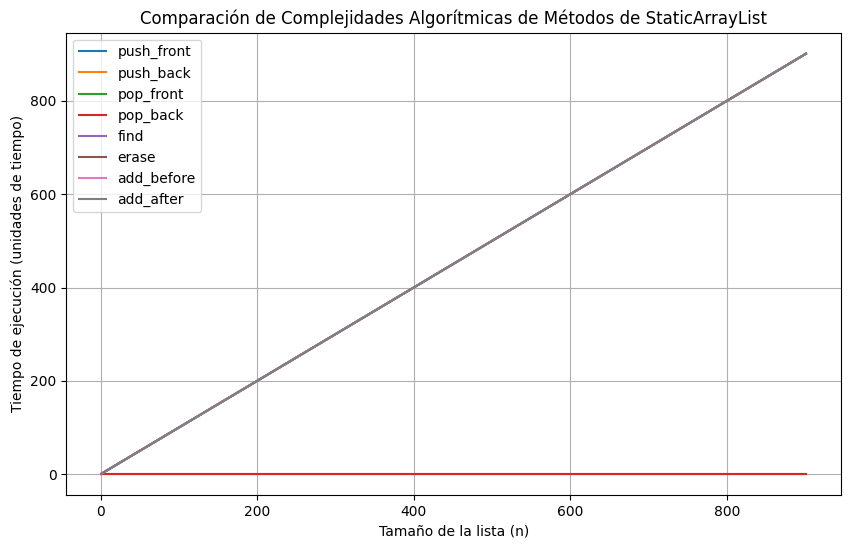

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de metodos y sus complejidades teoricas
methods = ["push_front", "push_back", "pop_front", "pop_back", "find", "erase", "add_before", "add_after"]
complexities = [lambda n: n, lambda n: 1, lambda n: n, lambda n: 1, lambda n: n, lambda n: n, lambda n: n, lambda n: n]

# Rango de tamaños de lista
n_values = np.arange(1, 1001, 100)

# Calcular tiempos simulados de ejecución
execution_times = {method: [complexity(n) for n in n_values] for method, complexity in zip(methods, complexities)}

# Graficar las complejidades
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(n_values, execution_times[method], label=method)

plt.xlabel("Tamaño de la lista (n)")
plt.ylabel("Tiempo de ejecución (unidades de tiempo)")
plt.title("Comparación de Complejidades Algorítmicas de Métodos de StaticArrayList")
plt.legend()
plt.grid(True)
plt.show()


[5.7220458984375, 12.874603271484375, 9.775161743164062, 42.91534423828125, 190.49644470214844, 852.1080017089844, 4226.207733154297, 48257.58934020996, 485306.2629699707]
[1.6689300537109375, 1.430511474609375, 0.7152557373046875, 1.1920928955078125, 1.6689300537109375, 1.430511474609375, 1.1920928955078125, 3.0994415283203125, 4.291534423828125]
[3.814697265625, 7.152557373046875, 9.5367431640625, 37.670135498046875, 79.15496826171875, 1140.1176452636719, 5199.670791625977, 47971.248626708984, 483437.77656555176]
[1.6689300537109375, 1.430511474609375, 0.7152557373046875, 1.430511474609375, 1.1920928955078125, 2.6226043701171875, 3.337860107421875, 4.0531158447265625, 5.9604644775390625]
[1.430511474609375, 1.6689300537109375, 1.1920928955078125, 5.0067901611328125, 1.430511474609375, 4.0531158447265625, 5.0067901611328125, 6.9141387939453125, 9.5367431640625]
[32.4249267578125, 7.152557373046875, 10.013580322265625, 143.28956604003906, 73.19450378417969, 411.2720489501953, 5063.0569

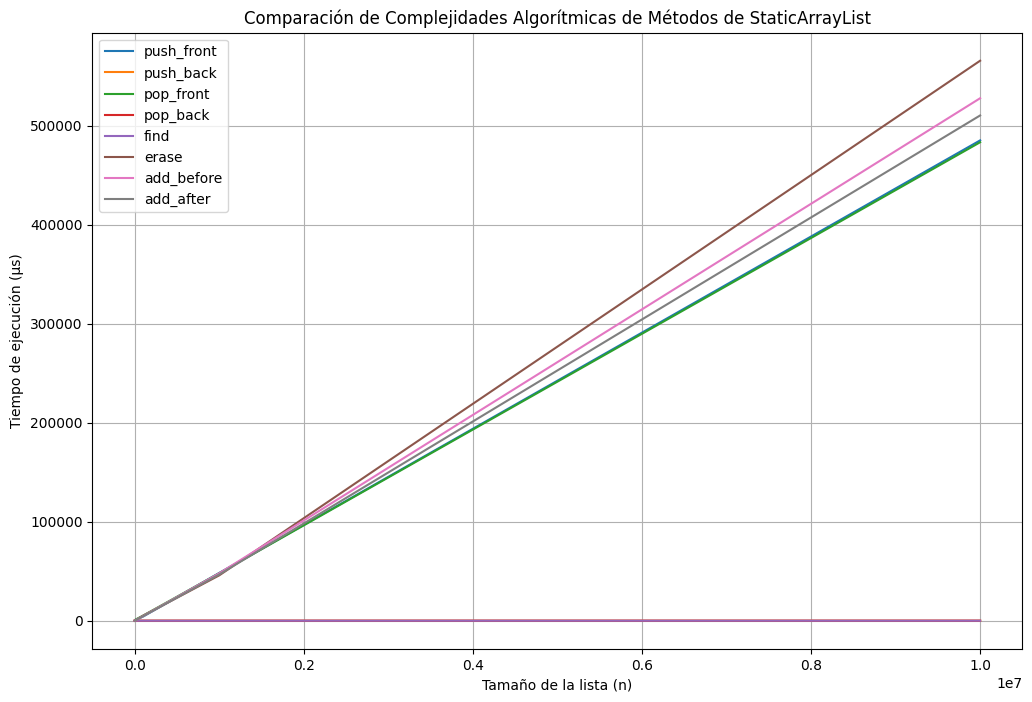

In [ ]:
import time
import matplotlib.pyplot as plt
from list import StaticArrayList  

# Definir los metodos a probar
methods = {
    'push_front': lambda lst: lst.push_front(0) if lst.size < lst.max_size else None,
    'push_back': lambda lst: lst.push_back(0) if lst.size < lst.max_size else None,
    'pop_front': lambda lst: lst.pop_front() if lst.size > 0 else None,
    'pop_back': lambda lst: lst.pop_back() if lst.size > 0 else None,
    'find': lambda lst: lst.find(0),
    'erase': lambda lst: lst.erase(0) if lst.size > 0 else None,
    'add_before': lambda lst: lst.add_before(1, -1) if lst.size > 1 and lst.size < lst.max_size else None,
    'add_after': lambda lst: lst.add_after(1, -1) if lst.size > 1 and lst.size < lst.max_size else None
}

def measure_execution_times(max_size, num_elements):
    execution_times = {}

    # Crear una lista y agregar elementos iniciales
    def create_list():
        array_list = StaticArrayList(max_size)
        for i in range(min(num_elements, max_size)):
            array_list.push_back(i)
        return array_list

    # Medir tiempos de ejecucion
    for method_name, method in methods.items():
        lst = create_list()
        start_time = time.time()
        method(lst)  # Se ejecuta el método sin excepción
        end_time = time.time()
        execution_times[method_name] = (end_time - start_time) * 1e6  # Convertir a microsegundos

    return execution_times

# Rango de tamaño de elementos para evaluar complejidad
element_counts = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
# Diccionario para almacenar tiempos por metodo
times_by_method = {method: [] for method in methods.keys()}

# Recolectar tiempos de ejecucion
for count in element_counts:
    times = measure_execution_times(count*2, count)
    for method, exec_time in times.items():
        times_by_method[method].append(exec_time)

# Graficar los resultados
plt.figure(figsize=(12, 8))
for method, times in times_by_method.items():
    print(times)
    plt.plot(element_counts, times, label=method)


plt.xlabel('Tamaño de la lista (n)')
plt.ylabel('Tiempo de ejecución (μs)')
plt.title('Comparación de Complejidades Algorítmicas de Métodos de StaticArrayList')
plt.legend()
plt.grid(True)
plt.show()


**Análisis:**

Teoricamente y como vemos en la primera grafica la complejidad algoritmica de las funciones debe ser la siguiente:

| Método       | Complejidad |
|--------------|-------------|
| `push_front` | \( O(n) \)  |
| `push_back`  | \( O(1) \)  |
| `pop_front`  | \( O(n) \)  |
| `pop_back`   | \( O(1) \)  |
| `find`       | \( O(n) \)  |
| `erase`      | \( O(n) \)  |
| `add_before` | \( O(n) \)  |
| `add_after`  | \( O(n) \)  |

Esto se explica fácilmente, porque siempre que se tenga que añadir un elemento al final de la lista el número de pasos va a ser el mismo, solo es cuestión de añadir en el último índice registrado el nuevo elemento en el caso de push back, o quitar el último elemento en el caso de pop back, y despues cambiar el contador. No importa que tan grande sea la lista o como cambie su tamaño siempre se hará de igual forma.


Para el resto de métodos si se ven afectados por cuantos elementos hay en la lista porque de una forma u otra la tienen que recorrer toda o hasta encontrar algo en ella.


**Comparación con los resultados experimentales**


Ahora experimentalmente vemos el mismo comportamiento esperado sin embargo find tiene un comportamiento de O(1), que es el único resultado que no corresponde con lo esperado teóricamente.


**Conclusiones:**

El comportamiento si corresponde al esperado, se denota que no todas las complejidades O(n) tienen la misma pendiente pues la teoría solo nos dice que son de esta familia, además los resultados varían según se corran pero seguramente si se corriera múltiples veces la simulación y se promediaron los resultados tendríamos una forma más regular.


La complejidad O(1) de find realmente no va encontra de los resultados esperados, porque en nuestro caso hicimos qué find siempre encuentre el elemento 0 de la lista, lo que siempre tomara la misma cantidad de pasos pues siempre lo encontrará en un paso, find puede demorar desde un paso hasta n pasos.


Esto no pasa con otros métodos porque hay otra acción que compensa esto, por ejemplo erase es de cierta forma find pero con una accion despues, si siempre encuentra el elemento de primeras, va a tener que mover n veces los elementos del array, y si el elemento que tenia que eliminar esta al final no tendrá que mover nada pero ya habrá recorrido la lista n veces.


**Dificultades:**

Como ya se mencionó anteriormente inicialmente se quería realizar un binding de C++ a python, porque aunque actualmente la forma de escribir la estructura en los dos lenguajes es bastante similar, para por ejemplo Linked Array tendrá mayor sentido trabajar con C++ sin embargo se encontraron varias dificultades, primero que C++ no tiene como tal un administrador de paquetes como podría ser **PiP o Conda en phyton**, o **Yarn, Node o Bun en Java-Type Script**, el administrador que se descargo fue **vcpkg** pero este tenía como dependencias **Cmaker** que también fue necesario instalar, pero a la hora de instalar la librería pybind11, se obtenía un error desconocido y él no se podía acceder al log. En mi computador local no pude lograrlo pero en otro computador si permite instalar la librería sin problema y transformar el código que un **.pyd**.